In [67]:
# Import the pathlib and csv library
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv
import random
import numpy as np
from MCForecastFantasy import MCSimulation
import panel as pn

%matplotlib inline

In [68]:
#os.getcwd()

In [69]:
#Setting the different CSV paths
data_2015_path = Path("./Resources/Historic_Data/fanduel_salary_production/NFL-HistoricalProduction_2015.csv")
data_2016_path = Path("./Resources/Historic_Data/fanduel_salary_production/NFL-HistoricalProduction_2016.csv")
data_2017_path = Path("./Resources/Historic_Data/fanduel_salary_production/NFL-HistoricalProduction_2017.csv")
data_2018_path = Path("./Resources/Historic_Data/fanduel_salary_production/NFL-HistoricalProduction_2018.csv")
data_2019_path = Path("./Resources/Historic_Data/fanduel_salary_production/NFL-HistoricalProduction_2019.csv")
data_2020_path = Path("./Resources/Historic_Data/fanduel_salary_production/NFL-HistoricalProduction_2020.csv")

In [70]:
#Reading in the CSV into into seperate dataframes
df_1 = pd.read_csv(data_2015_path)
df_2 = pd.read_csv(data_2016_path)
df_3 = pd.read_csv(data_2017_path)
df_4 = pd.read_csv(data_2018_path)
df_5 = pd.read_csv(data_2019_path)
df_6 = pd.read_csv(data_2020_path)

In [71]:
#Appending a column "Year" for each dataframe
df_1['Year'] = 2015

df_2['Year'] = 2016

df_3['Year'] = 2017

df_4['Year'] = 2018

df_5['Year'] = 2019

df_6['Year'] = 2020


In [72]:
#Concating all dataframes into one 
combined_df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6], axis='rows', join='inner')
combined_df.reset_index(inplace=True)


In [73]:
#Drop Columns
combined_df.drop(['DKSal','DK Points','index'], axis = 1, inplace=True)
#combined_df
combined_df['Year/Week'] = combined_df['Year']+combined_df['Week']/100
combined_df.round(decimals = 2)
combined_df['Year/Week'] = combined_df['Year/Week'].apply(str)

#sort dataframe by player and year/week
combined_df_2 = combined_df.sort_values(by=['Player', 'Year/Week'])

#rename columns
combined_df_2.rename(columns={'FD Points': "Points","FDSal": "Salary","P":"Position"},inplace= True)

#check for null values
combined_df_2.isnull().sum()

Position             0
Player               0
Week                 0
Team                 0
Opp                  0
Opp Position Rank    0
Salary               0
Points               0
Year                 0
Year/Week            0
dtype: int64

In [74]:

combined_df_2.dtypes

Position              object
Player                object
Week                   int64
Team                  object
Opp                   object
Opp Position Rank      int64
Salary                 int64
Points               float64
Year                   int64
Year/Week             object
dtype: object

In [75]:
#combined_df.dtypes

In [76]:


combined_df_2

,Position,Player,Week,Team,Opp,Opp Position Rank,Salary,Points,Year,Year/Week
36606,WR,A.J. Brown,1,TEN,CLE,11,5100,11.5,2019,2019.01
38173,WR,A.J. Brown,2,TEN,IND,16,5400,4.0,2019,2019.02
39545,WR,A.J. Brown,3,TEN,JAX,21,5200,0.9,2019,2019.03
35564,WR,A.J. Brown,4,TEN,ATL,12,4700,22.9,2019,2019.04
38256,WR,A.J. Brown,5,TEN,BUF,3,5600,3.7,2019,2019.05
38390,WR,A.J. Brown,6,TEN,DEN,4,5400,3.3,2019,2019.06
36985,WR,A.J. Brown,7,TEN,LAC,6,5300,9.2,2019,2019.07
37182,WR,A.J. Brown,8,TEN,TB,30,5500,8.1,2019,2019.08
36846,WR,A.J. Brown,9,TEN,CAR,14,5500,10.1,2019,2019.09
38839,WR,A.J. Brown,10,TEN,KC,8,5500,2.2,2019,2019.1


In [77]:
#Create Function which allows you to easily filter the dataframe
"""
Arguments:
    df : pandas.Dataframe
        the main data frame you pass to the filter function
    players: list (optional)
        a list of player names
    year: list (optional)
        a list of years for which you want data
    position: list (optional)
        a list of positions for which you want data
    team: list (optional)
        a list of teams for which you want data
    not_points: list (optional)
        a list of point values you want to exclude (ex. may want to exclude zero point games)

"""
    



def choose_roster(df, players=[], year=[], position=[],team=[], not_points=[]):
    #filter based on player name
    if len(players)>0:    
        df=df[df['Player'].isin(players)]
    
    #filter based on year
    if len(year)>0:
        df=df[df['Year'].isin(year)]
     
    #filter based on position
    if len(position)>0:
        df=df[df['Position'].isin(position)]
    
    #filter based on team
    if len(team)>0:
        df=df[df['Team'].isin(team)]
    
    #remove entries with certain point values    
    if len(not_points)>0:
        df=df[~df['Points'].isin(not_points)] 
        
    return df


In [78]:
#combined_df_2[combined_df_2["Team"]].distinct

In [79]:
choose_roster(combined_df_2, team=['NYJ'],position=["TE"],year=["2020"])

,Position,Player,Week,Team,Opp,Opp Position Rank,Salary,Points,Year,Year/Week
45445,TE,Chris Herndon,1,NYJ,BUF,5,4700,4.7,2020,2020.01
46211,TE,Chris Herndon,2,NYJ,SF,5,5100,1.0,2020,2020.02
45620,TE,Chris Herndon,3,NYJ,IND,1,5000,3.6,2020,2020.03
46024,TE,Chris Herndon,4,NYJ,DEN,21,4800,1.6,2020,2020.04
45656,TE,Chris Herndon,5,NYJ,ARI,16,4800,3.4,2020,2020.05
47751,TE,Chris Herndon,6,NYJ,MIA,5,4700,0.0,2020,2020.06
47932,TE,Chris Herndon,7,NYJ,BUF,30,4600,0.0,2020,2020.07
48497,TE,Chris Herndon,8,NYJ,KC,14,4400,-1.2,2020,2020.08
46552,TE,Daniel Brown,1,NYJ,BUF,5,4000,0.0,2020,2020.01
46794,TE,Daniel Brown,2,NYJ,SF,5,4000,0.0,2020,2020.02


In [109]:
#Visualization of Player Production Per Week
choose_roster(combined_df_2,not_points=[0]).hvplot.bar(x='Year/Week',y="Points",ylabel='Points',groupby='Player', rot=90)


:DynamicMap   [Player]
   :Bars   [Year/Week]   (Points)

In [81]:
choose_roster(combined_df_2,not_points=[0]).hvplot.box(y="Points",by="Year",groupby='Player', rot=90)

:DynamicMap   [Player]
   :BoxWhisker   [Year]   (Points)

In [119]:
(choose_roster(combined_df_2,not_points=[0],position=["TE","WR","QB","RB"]).sort_values(by="Year").groupby(["Year","Position","Player"]).sum()).hvplot.box(y="Points",by="Position",groupby='Year', rot=90)

:DynamicMap   [Year]
   :BoxWhisker   [Position]   (Points)

In [118]:
(choose_roster(combined_df_2,not_points=[0],position=["TE","WR","QB","RB"]).sort_values(by="Year").groupby(["Year","Position","Player"]).sum()).hvplot.box(y="Points",by="Year",groupby="Position",rot=90)

:DynamicMap   [Position]
   :BoxWhisker   [Year]   (Points)

In [84]:
#(choose_roster(combined_df_2,not_points=[0],position=["TE","WR","QB","RB"]).sort_values(by="Points").groupby(["Year","Player"]).mean()).hvplot.box(y="Points",by="Player",groupby="Year",rot=90)

In [85]:
player_1=choose_roster(combined_df_2,players=['Christian McCaffrey','A.J. Brown',"Drew Brees", "Alvin Kamara","Mark Andrews","Tyreek Hill","Kenny Golladay"],year=[2018,2019,2020],not_points=[0])
player_1

,Position,Player,Week,Team,Opp,Opp Position Rank,Salary,Points,Year,Year/Week
36606,WR,A.J. Brown,1,TEN,CLE,11,5100,11.5,2019,2019.01
38173,WR,A.J. Brown,2,TEN,IND,16,5400,4.0,2019,2019.02
39545,WR,A.J. Brown,3,TEN,JAX,21,5200,0.9,2019,2019.03
35564,WR,A.J. Brown,4,TEN,ATL,12,4700,22.9,2019,2019.04
38256,WR,A.J. Brown,5,TEN,BUF,3,5600,3.7,2019,2019.05
38390,WR,A.J. Brown,6,TEN,DEN,4,5400,3.3,2019,2019.06
36985,WR,A.J. Brown,7,TEN,LAC,6,5300,9.2,2019,2019.07
37182,WR,A.J. Brown,8,TEN,TB,30,5500,8.1,2019,2019.08
36846,WR,A.J. Brown,9,TEN,CAR,14,5500,10.1,2019,2019.09
38839,WR,A.J. Brown,10,TEN,KC,8,5500,2.2,2019,2019.1


In [86]:
num_sims=500
games=13

MC_roster=MCSimulation(
    roster=player_1,
    number_simulation=num_sims,
    number_game=games


)

In [87]:
MC_roster.calc_points()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,108.632375,116.915278,116.779202,93.827344,120.587921,111.246677,110.797436,123.647884,100.574787,80.811110,...,63.858412,126.618611,95.161083,129.626692,112.417214,82.773521,116.143016,94.653954,133.116843,138.637363
1,209.974451,254.686127,240.595489,224.380452,266.517475,244.403105,181.171025,245.375502,250.110408,195.175058,...,157.731917,224.185560,228.178990,274.389610,233.733409,193.476289,247.560148,206.713174,218.818187,261.338942
2,359.199657,384.577422,378.032671,315.071805,390.643706,323.764508,308.892955,334.766943,353.318278,309.419256,...,285.428329,326.729628,365.238942,366.969276,368.930340,332.077213,356.539068,341.681375,318.034351,442.371724
3,437.931128,488.362827,528.573796,397.748362,517.829659,471.285906,417.152561,440.364532,466.841073,433.222226,...,405.634900,409.511765,534.230009,452.398173,483.219947,456.363512,482.922771,444.980358,456.592112,561.897750
4,548.840971,592.437204,642.184287,539.028675,620.577727,589.012522,519.941841,568.050467,610.287860,518.653096,...,503.933114,516.241843,635.226106,552.718938,578.102525,609.302348,604.658660,543.903049,599.085138,692.208217
5,651.987844,745.615255,754.591530,639.534308,704.953156,752.449272,642.592225,650.117536,724.838860,631.457500,...,625.821755,657.171877,735.202213,677.668612,685.544131,732.183456,675.887504,611.279732,734.497307,832.367015
6,793.395861,880.996916,880.786040,742.580995,828.420500,857.180258,793.230181,751.829869,855.123587,780.779502,...,767.175153,762.987723,853.520023,754.861551,802.047058,847.605816,792.121492,714.600954,824.977155,944.768735
7,879.389666,937.339806,1004.792342,889.752252,962.172512,1002.065659,935.819408,840.817974,944.220971,891.779527,...,889.713265,914.499426,970.080971,895.043190,908.703810,918.694060,899.401935,816.313232,977.252483,1053.724660
8,1002.037024,1053.331565,1096.917910,998.790327,1084.260567,1091.308340,1052.953305,971.541003,1041.712009,968.697949,...,1046.689564,1016.129444,1112.805940,984.346264,975.894278,1024.481245,1000.985174,926.542555,1096.100948,1198.115053
9,1138.927459,1182.076401,1166.858962,1088.404956,1203.244390,1180.795024,1194.822826,1081.425670,1200.269992,1080.858288,...,1157.629210,1096.528710,1251.256802,1085.716584,1114.199298,1127.353161,1130.795162,1050.683251,1205.813525,1297.560775


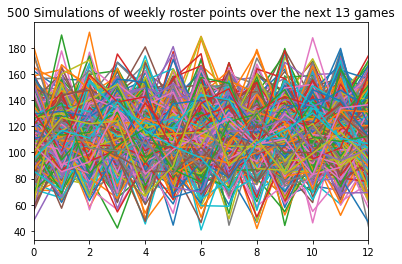

In [88]:
MC_roster.plot_weekly_simulation()

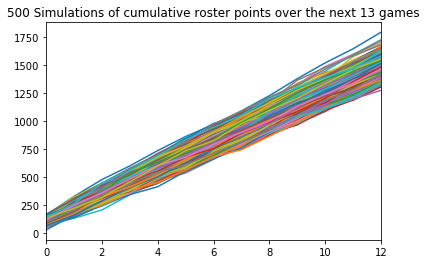

In [89]:
MC_roster.plot_szn_simulation()

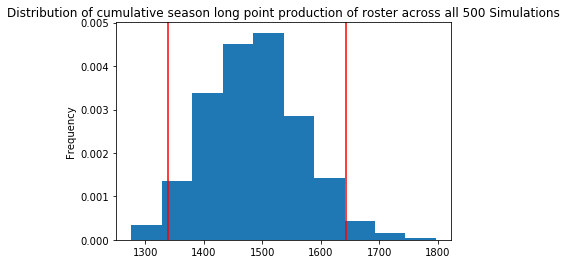

In [90]:
MC_roster.plot_szn_distribution()

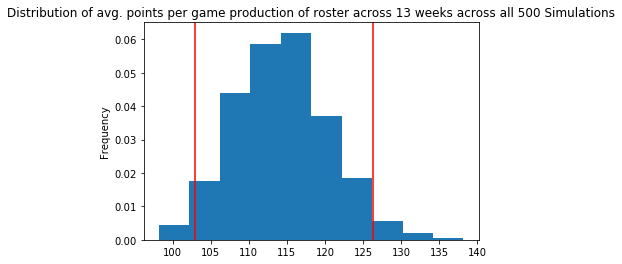

In [91]:
MC_roster.plot_avg_szn_distribution()

In [92]:
#MC_roster.plot_avg_szn_distribution()+MC_roster.plot_avg_szn_distribution()

#gitl

In [93]:
MC_roster.summarize_szn_points()

count            500.000000
mean            1486.266470
std               79.720417
min             1276.412003
25%             1428.892745
50%             1485.469450
75%             1537.516692
max             1796.520237
95% CI Lower    1338.559373
95% CI Upper    1642.310556
Name: 12, dtype: float64

In [94]:
MC_roster.summarize_avg_szn_points()

count           500.000000
mean            114.328190
std               6.132340
min              98.185539
25%             109.914827
50%             114.266881
75%             118.270515
max             138.193864
95% CI Lower    102.966106
95% CI Upper    126.331581
Name: 12, dtype: float64

In [124]:
#Creating Dashboard
# Create tabs
project_dashboard = pn.Tabs(
    ("Player Production Chart Per Game",choose_roster(combined_df_2,not_points=[0]).hvplot.bar(x='Year/Week',y="Points",ylabel='Points',groupby='Player', rot=90)
), ("Comparison of Positional Prodcution Per Year", (choose_roster(combined_df_2,not_points=[0],position=["TE","WR","QB","RB"]).sort_values(by="Year").groupby(["Year","Position","Player"]).sum()).hvplot.box(y="Points",by="Position",groupby='Year', rot=90)
), ("Positional Produdction Per Year", (choose_roster(combined_df_2,not_points=[0],position=["TE","WR","QB","RB"]).sort_values(by="Year").groupby(["Year","Position","Player"]).sum()).hvplot.box(y="Points",by="Year",groupby="Position",rot=90)
)

SyntaxError: unexpected EOF while parsing (<ipython-input-124-e9e75a2195a6>, line 7)

In [125]:
#Displaying Dashboard
project_dashboard.servable()

Tabs(active=1)
    [0] Row(name='Player Production C...)
        [0] HoloViews(DynamicMap, name='Player Production C...)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), name='Player', options=['A.J. Brown', ...], value='A.J. Brown', width=250)
            [1] VSpacer()
    [1] Row(name='Comparison of P...)
        [0] HoloViews(DynamicMap, name='Comparison of P...)
        [1] Column
            [0] WidgetBox
                [0] DiscreteSlider(margin=(20, 20, 20, 20), name='Year', options=OrderedDict([('2015', ...]), value=2015, width=250)
            [1] VSpacer()
    [2] Row(name='Positional Produdction P...)
        [0] HoloViews(DynamicMap, name='Positional Produdction P...)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), name='Position', options=['QB', 'RB', 'TE', 'WR'], value='QB', width=250)
            [1] VSpacer()